In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.stats.diagnostic import lilliefors
from statsmodels.stats.weightstats import ztest
import plotly.express as px
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

enem_sp = pd.read_csv('/Users/paull/OneDrive/Área de Trabalho/LEONARDO/python/jupyter/enem_2019_tratado.csv',
                     sep = ',', encoding = 'iso-8859-1')




In [10]:
colegiox = enem_sp.loc[enem_sp.CO_ESCOLA == 35017632.0]
nota_final = ['NOTA_CN', 'NOTA_CH','NOTA_LC','NOTA_REDACAO','NOTA_MT']


In [15]:
colegiox['nota_final'] = (colegiox[nota_final].mean(axis = 1))
nota_colegiox = colegiox[['NOTA_CN','NOTA_MT','NOTA_LC','NOTA_CH','NOTA_REDACAO','nota_final']]


In [16]:
regressao = smf.ols('nota_final ~ NOTA_REDACAO', data = nota_colegiox).fit()
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:             nota_final   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     17.02
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           0.000188
Time:                        09:04:52   Log-Likelihood:                -223.52
No. Observations:                  41   AIC:                             451.0
Df Residuals:                      39   BIC:                             454.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      251.6789     47.319      5.319   

In [18]:
coefs = pd.DataFrame(regressao.params)
coefs.colums = ['Coeficientes']
print(coefs)

                       0
Intercept     251.678855
NOTA_REDACAO    0.362749


C:\Users\paull\AppData\Local\Temp\ipykernel_10556\1579223204.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  coefs.colums = ['Coeficientes']


Equação:

    Nota Final = 251.678855 + 0.362749*NOTA_REDACAO

In [23]:
nota_colegiox.head()

,NOTA_CN,NOTA_MT,NOTA_LC,NOTA_CH,NOTA_REDACAO,nota_final
37,46.3,537.1,557.3,447.2,340.0,385.58
44,505.9,451.9,529.8,534.5,720.0,548.42
52,449.4,506.4,45.8,436.4,560.0,399.60
65,468.6,59.5,576.6,606.1,520.0,446.16
79,414.3,510.6,49.5,553.7,640.0,433.62


In [24]:
regressao.predict()

array([375.01357169, 512.85825473, 454.81838819, 440.30842155,
       483.83832146, 382.268555  , 498.3482881 , 454.81838819,
       469.32835482, 440.30842155, 447.56340487, 433.05343823,
       491.09330478, 353.24862173, 440.30842155, 411.28848828,
       425.79845491, 440.30842155, 425.79845491, 447.56340487,
       491.09330478, 491.09330478, 447.56340487, 491.09330478,
       440.30842155, 469.32835482, 469.32835482, 396.77852164,
       447.56340487, 425.79845491, 396.77852164, 469.32835482,
       454.81838819, 433.05343823, 440.30842155, 353.24862173,
       469.32835482, 447.56340487, 440.30842155, 396.77852164,
       476.58333814])

In [28]:
residuos = regressao.resid
residuos

37         10.566428
44         35.561745
52        -55.218388
65          5.851578
79        -50.218321
84         39.811445
85         36.531712
91         63.921612
17070      57.251645
17072    -127.628422
17078     -22.083405
17110     -42.653438
108151     17.606695
108155     87.571378
108180     55.451578
138498    -68.448488
182510     86.501545
182519     18.771578
182528     27.621545
182546    -30.503405
182581    -45.833305
182613    -50.333305
182614     78.516595
182615     42.066695
182637    -42.508422
182683     31.031645
182697   -148.128355
230978    -59.558522
287389     13.896595
287716    -40.338455
347945    -65.858522
365950      5.551645
365951    -61.998388
365980    -21.493438
365984     39.151578
365986    -28.028622
378313     91.931645
445647    -22.163405
445741     31.491578
445790     45.381478
445809     60.956662
dtype: float64

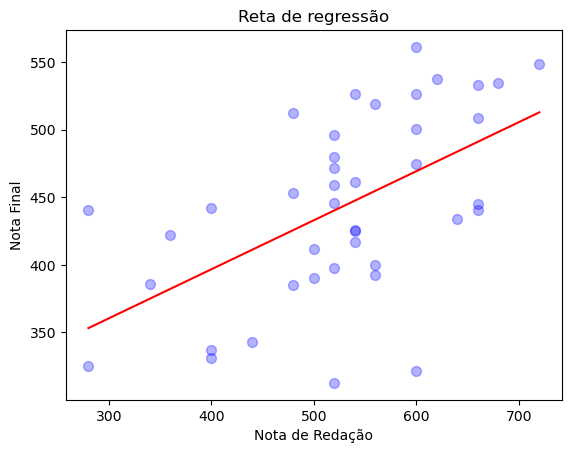

In [29]:
plt.scatter( y = nota_colegiox.nota_final, x=nota_colegiox.NOTA_REDACAO, color = 'blue', s=50, alpha = .3 )
# criar um gráfico de dispersão em que y é a nota final; e x a nota de redação

x_plot = np.linspace(min(nota_colegiox.NOTA_REDACAO), max(nota_colegiox.NOTA_REDACAO), len(nota_colegiox.NOTA_REDACAO))
#define os valores máximos e mínimos e limita o número de eixos de acordo com a quantidade de notas de Nota de redação

# obs:  x_plot = np.linspace(0,1000) para nota máxima e mínima geral

plt.plot(x_plot, x_plot*regressao.params[1] + regressao.params[0], color = 'r')
# monta a equação de acordo com a fórmula de cime com os parametros

plt.title('Reta de regressão')
plt.ylabel('Nota Final')
plt.xlabel('Nota de Redação')
plt.show()

# Teste de Normalidade dos Resíduos

In [30]:
stats.shapiro(residuos)

ShapiroResult(statistic=0.9587119221687317, pvalue=0.1417592167854309)

<function matplotlib.pyplot.show(close=None, block=None)>

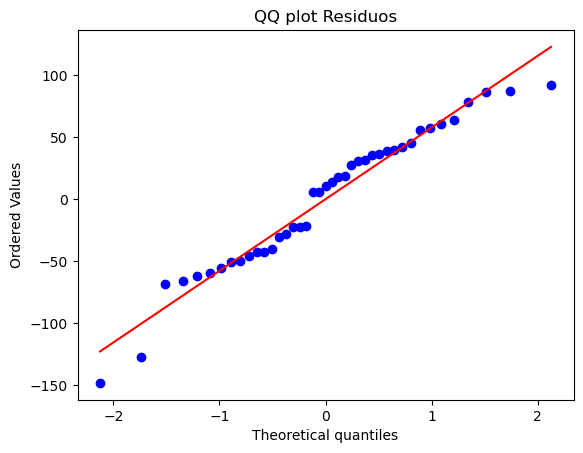

In [32]:
stats.probplot(residuos, dist = "norm", plot = plt)
plt.title ("QQ plot Residuos")
plt.show

# Análise da Homocedasticidade dos resíduos
(residuos com variação constante)

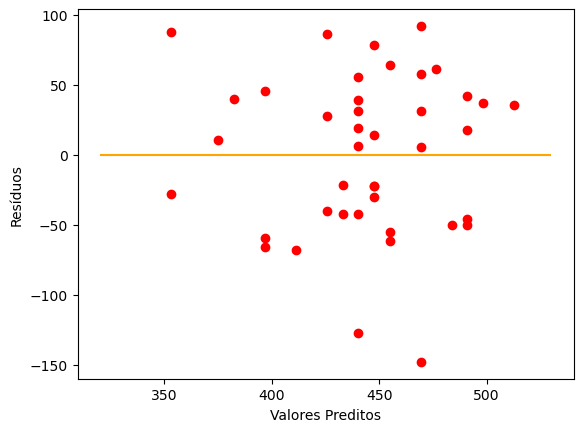

In [34]:
plt.scatter(y= residuos, x = regressao.predict(), color = 'red')
plt.hlines(y=0, xmin = 320, xmax = 530, color = 'orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

#deve ser semelhante a um retangulo